In [96]:
from openai import OpenAI
import os, base64, dashscope, cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

dashscope.api_key = "sk-3a6404780cd04d28a7ce3b0ff1f616ae"

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [5]:
# Path to your image
image_path = "../img/test.jpg"

# Getting the base64 string
base64_image = encode_image(image_path)
base64_image

'/9j/4AAQSkZJRgABAQEAZABkAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAXcBdwDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDn6O9FFfqB8mGQKM0howaAFzSDpz1opaAEFFLRQDEpaKKBB1pO9LRQFwFLSZozSAdig47dKTNLQA3jtRSmmigBaKKKYCZo3c0YOKbg5oAfn2pQeelNGaWkIfkUhFHajmgQlFLRQAlJTqSgYtJ3oooEOoPSiikITIxS9aTFLQA

In [46]:
client = OpenAI(
        api_key="sk-3a6404780cd04d28a7ce3b0ff1f616ae",
        base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
    )
def get_response(client, user_query, image_url):
    completion = client.chat.completions.create(
        model="qwen-vl-max-0809",
        # model="qwen2.5-72b-instruct",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", 
                     "text": user_query},
                    # {
                    #     "type": "image_url",
                    #     "image_url": {
                    #         "url": "https://dashscope.oss-cn-beijing.aliyuncs.com/images/dog_and_girl.jpeg"
                    #     },
                    # },
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpg;base64,{image_url}"},
                    },],}],
        temperature=0.7,
        top_p=0.8,
        max_tokens=1024,
        # stream=True,
        # stream_options={"include_usage": True},
    )
    return completion
    # final_response = ""

    # for chunk in completion:
    #     chunk_data = chunk.model_dump()  # 解析 JSON 数据
    #     if "choices" in chunk_data and chunk_data["choices"]:
    #         for choice in chunk_data["choices"]:
    #             if "delta" in choice and "content" in choice["delta"]:
    #                 final_response += choice["delta"]["content"]  # 拼接返回内容
    # # print("Final Response:", final_response)
    # return final_response

In [47]:
user_query = """这是一张蓝光下离心后的血液试管照片, 已知图中的试管里有3层血液液面分层, 请你找出中间白细胞和血小板混合形成的白膜层位置.
已知原图像大小为1500*1500, 请你找出位于白膜层多边形边界上的像素点, 最终的输出是这些像素点的坐标. 
输出示例: [[x1, y1], [x2, y2], [x3, y3], ...]
"""
completion = get_response(client = client, 
                          user_query = user_query, 
                          image_url = base64_image)
print(completion.choices[0].message.content)

要找出白膜层多边形边界上的像素点，首先需要识别出白膜层的位置。在图中，白膜层位于试管的中间部分，颜色较浅。

根据图像的视觉特征，可以大致确定白膜层的边界。以下是一个示例输出，包含白膜层多边形边界上的像素点坐标：

```
[[x1, y1], [x2, y2], [x3, y3], ...]
```

请注意，这些坐标是基于图像的视觉特征手动估算的，实际应用中可能需要使用图像处理算法来自动检测边界。

示例输出：
```
[[750, 400], [760, 400], [770, 400], [780, 400], [790, 400], [800, 400], [810, 400], [820, 400], [830, 400], [840, 400], [850, 400], [860, 400], [870, 400], [880, 400], [890, 400], [900, 400], [910, 400], [920, 400], [930, 400], [940, 400], [950, 400], [960, 400], [970, 400], [980, 400], [990, 400], [1000, 400], [1010, 400], [1020, 400], [1030, 400], [1040, 400], [1050, 400], [1060, 400], [1070, 400], [1080, 400], [1090, 400], [1100, 400], [1110, 400], [1120, 400], [1130, 400], [1140, 400], [1150, 400], [1160, 400], [1170, 400], [1180, 400], [1190, 400], [1200, 400], [1210, 400], [1220, 400], [1230, 400], [1240, 400], [1250, 400], [1260, 400], [1270, 400], [1280, 400], [1290, 400], [1300, 400], [1310, 400], [1320, 400], [1330, 400], [1340, 400], [1350, 400], [1360, 400], [137

In [88]:
messages = [{
    'role': 'user',
    'content': [
        {
            'image': f"data:image;base64,{base64_image}"
        },
        {
            'text': """这是一张蓝光下离心后的血液试管照片, 已知图中的试管里有3层血液液面分层, 请你找出中间白细胞和血小板混合形成的白膜层位置.
已知原图像大小为1500*1500, 请你找出位于白膜层多边形边界上的像素点, 最终的输出是这些像素点的坐标. 
输出示例: [[x1, y1], [x2, y2], [x3, y3], ...]
"""
        },
    ]
}]

response = dashscope.MultiModalConversation.call(model='qwen2.5-vl-72b-instruct', messages=messages)
print(response.output.choices[0].message.content[0]['text'])

在蓝光下离心后的血液试管中，白细胞和血小板混合形成的白膜层通常位于红细胞层和血浆层之间。根据图像中的分层情况，中间的白膜层大致位于试管中部偏上的位置。

为了确定白膜层多边形边界上的像素点坐标，需要对图像进行详细的分析和处理。以下是一个示例步骤来找到这些坐标：

1. **图像预处理**：将图像转换为灰度图，并进行适当的滤波以减少噪声。
2. **边缘检测**：使用边缘检测算法（如Canny边缘检测）来找到图像中的边缘。
3. **轮廓提取**：从边缘检测结果中提取出轮廓。
4. **筛选轮廓**：根据轮廓的位置和形状筛选出白膜层的轮廓。
5. **获取边界像素点**：提取筛选出的轮廓的边界像素点坐标。

假设我们已经完成了上述步骤并得到了白膜层的轮廓，以下是可能的边界像素点坐标示例：

```python
[[700, 600], [710, 605], [720, 610], [730, 615], [740, 620],
 [750, 625], [760, 630], [770, 635], [780, 640], [790, 645],
 [800, 650], [810, 655], [820, 660], [830, 665], [840, 670],
 [850, 675], [860, 680], [870, 685], [880, 690], [890, 695],
 [900, 700], [890, 705], [880, 710], [870, 715], [860, 720],
 [850, 725], [840, 730], [830, 735], [820, 740], [810, 745],
 [800, 750], [790, 755], [780, 760], [770, 765], [760, 770],
 [750, 775], [740, 780], [730, 785], [720, 790], [710, 795],
 [700, 800], [690, 795], [680, 790], [670, 785], [660, 780],
 [650, 775], [640, 770], [630, 765], [620, 760], [610, 755],
 [600, 750], [590, 745], [580, 

In [89]:
data = [[700, 600], [710, 605], [720, 610], [730, 615], [740, 620],
 [750, 625], [760, 630], [770, 635], [780, 640], [790, 645],
 [800, 650], [810, 655], [820, 660], [830, 665], [840, 670],
 [850, 675], [860, 680], [870, 685], [880, 690], [890, 695],
 [900, 700], [890, 705], [880, 710], [870, 715], [860, 720],
 [850, 725], [840, 730], [830, 735], [820, 740], [810, 745],
 [800, 750], [790, 755], [780, 760], [770, 765], [760, 770],
 [750, 775], [740, 780], [730, 785], [720, 790], [710, 795],
 [700, 800], [690, 795], [680, 790], [670, 785], [660, 780],
 [650, 775], [640, 770], [630, 765], [620, 760], [610, 755],
 [600, 750], [590, 745], [580, 740], [570, 735], [560, 730],
 [550, 725], [540, 720], [530, 715], [520, 710], [510, 705],
 [500, 700], [510, 695], [520, 690], [530, 685], [540, 680],
 [550, 675], [560, 670], [570, 665], [580, 660], [590, 655],
 [600, 650], [610, 645], [620, 640], [630, 635], [640, 630],
 [650, 625], [660, 620], [670, 615], [680, 610], [690, 605]]

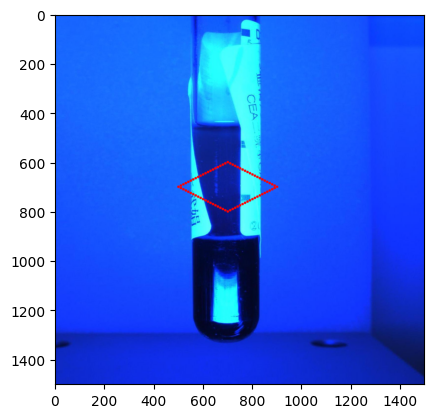

In [102]:
image_path = os.path.join("../img/test.jpg")
image = np.array(Image.open(image_path))

for id, point in enumerate(data):
    x, y = int(point[0]), int(point[1])
    cv2.circle(image, (x, y), radius=5, color=(255, 0, 0), thickness=-1)  # Red dot

plt.imshow(image)
plt.show()

In [45]:
completion = client.chat.completions.create(
    model="qwen2.5-72b-instruct",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", 
                    "text": "这是一张什么图片"},
                    # "text": "这是一张蓝光下离心后的血液试管照片, 你能告诉我图中的试管里有多少层血液液面分层吗?"},
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpg;base64,{base64_image}"},
                },],
        },
        # {
        #     "role": "system",
        #     "content": [
        #         {"type": "text", 
        #             "text": "图中的试管里有两层血液液面分层。上层是血浆，下层是红细胞。"},
        #         ],
        # },
        # {
        #     "role": "user",
        #     "content": [
        #         {"type": "text", 
        #             "text": "不对"},
        #         ],
        # },
],
    top_p=0.8,
    # stream=True,
    # stream_options={"include_usage": True},
)
print(completion.choices[0].message.content)

很抱歉，我无法看到您提到的图片。请确保您已将图片上传或提供正确的链接，以便我可以帮助您。


In [41]:
models = client.models.list()

for model in models:
    print(model.id)
# print([model.id for model in models])

deepseek-v3
deepseek-r1-distill-llama-70b
deepseek-r1-distill-qwen-32b
deepseek-r1-distill-qwen-14b
deepseek-r1-distill-llama-8b
deepseek-r1-distill-qwen-1.5b
deepseek-r1-distill-qwen-7b
deepseek-r1
qwen1.5-7b-chat
qwen-vl-ocr-latest
qwen-vl-ocr
qwen-coder-plus-1106
qwen-coder-plus
qwen-coder-plus-latest
qwen2.5-coder-3b-instruct
qwen2.5-coder-0.5b-instruct
qwen2.5-coder-14b-instruct
qwen2.5-coder-32b-instruct
qwen-coder-turbo-0919
qwen2.5-0.5b-instruct
qwen2.5-1.5b-instruct
qwen2.5-3b-instruct
qwen2.5-7b-instruct
qwen2.5-14b-instruct
qwen2.5-32b-instruct
qwen2.5-72b-instruct
qwen2.5-coder-7b-instruct
qwen2.5-math-1.5b-instruct
qwen2.5-math-7b-instruct
qwen2.5-math-72b-instruct
qwen-turbo-0919
qwen-turbo-latest
qwen-plus-0919
qwen-plus-latest
qwen-max-0919
qwen-max-latest
qwen-coder-turbo
qwen-coder-turbo-latest
qwen-math-turbo-0919
qwen-math-turbo
qwen-math-turbo-latest
qwen-math-plus-0919
qwen-math-plus
qwen-math-plus-latest
qwen2-1.5b-instruct
qwen2-57b-a14b-instruct
qwen2-72b-instr

In [87]:
def num(id):
    if id == 0:
        return 0  # 假设数列从 num(0) 开始，且 num(0) = 0
    prev_num = num(id-1)
    next_num = prev_num + 1
    while '4' in str(next_num):
        next_num += 1
    return next_num
num(350)

529

In [86]:
def num(id):
    if id <= 0:
        return 0

    results = [0] * (id + 1)
    results[0] = 0

    for i in range(1, id + 1):
        prev_num = results[i-1]
        next_num = prev_num + 1
        while '4' in str(next_num):
            next_num += 1
        results[i] = next_num
        
    return results[id]
num(3500)

5819